# Decison Trees


First we'll load some fake data on past hires I made up. Note how we use pandas to convert a csv file into a DataFrame:


In [22]:
# Importing the numpy library for numerical operations
import numpy as np

# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the tree module from the scikit-learn library for decision tree algorithms
from sklearn import tree

# Specifying the name of the input file that contains the dataset
input_file = "PastHires.csv"

# Reading the dataset from the CSV file into a pandas DataFrame
# 'header=0' indicates that the first row of the file contains the column names
df = pd.read_csv(input_file, header=0)


In [23]:
df.head(20)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


scikit-learn needs everything to be numerical for decision trees to work. So, we'll map Y,N to 1,0 and levels of education to some scale of 0-2. In the real world, you'd need to think about how to deal with unexpected or missing data! By using map(), we know we'll get NaN for unexpected values.


In [24]:
# Creating a dictionary 'd' to map 'Y' to 1 and 'N' to 0
d = {"Y": 1, "N": 0}

# Applying the mapping to the 'Hired' column of the DataFrame.
# This converts 'Y' to 1 and 'N' to 0 in the 'Hired' column.
df["Hired"] = df["Hired"].map(d)

# Applying the same mapping to the 'Employed?' column.
df["Employed?"] = df["Employed?"].map(d)

# Applying the same mapping to the 'Top-tier school' column.
df["Top-tier school"] = df["Top-tier school"].map(d)

# Applying the same mapping to the 'Interned' column.
df["Interned"] = df["Interned"].map(d)

# Creating a new dictionary to map education levels to numerical values.
# 'BS' is mapped to 0, 'MS' to 1, and 'PhD' to 2.
d = {"BS": 0, "MS": 1, "PhD": 2}

# Applying this mapping to the 'Level of Education' column.
df["Level of Education"] = df["Level of Education"].map(d)

# Displaying the first 20 rows of the DataFrame to check the changes.
df.head(20)


,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0
5,0,0,0,2,1,1,1
6,5,1,2,1,0,1,1
7,3,0,1,0,0,1,1
8,15,1,5,0,0,0,1
9,0,0,0,0,0,0,0


Next we need to separate the features from the target column that we're trying to bulid a decision tree for.


In [25]:
# Selecting the first six columns from the DataFrame 'df' as features for the model.
# The 'columns[:6]' syntax retrieves the column names from the first column up to, but not including, the seventh column.
# This list of column names is then stored in the variable 'features'.
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

Now actually construct the decision tree:


In [26]:
# Extracting the 'Hired' column from the DataFrame and storing it in variable 'y'.
# This column represents the target variable (dependent variable) you want to predict.
y = df["Hired"]

# Selecting the columns specified in the 'features' list from the DataFrame and storing them in 'X'.
# These columns are the independent variables (features) that the model will use to make predictions.
X = df[features]

# Creating an instance of the DecisionTreeClassifier class.
# This instance 'clf' (short for classifier) will be the decision tree model.
clf = tree.DecisionTreeClassifier()

# Training the decision tree classifier with the feature data 'X' and the target variable 'y'.
# The 'fit' method adjusts the weights of the decision tree to learn from the data 'X' and the corresponding labels 'y'.
clf = clf.fit(X, y)


... and display it. Note you need to have pydotplus installed for this to work. (!pip install pydotplus)

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the time we get to that point. value = [3. 0.] means 3 no-hires and 0 hires.


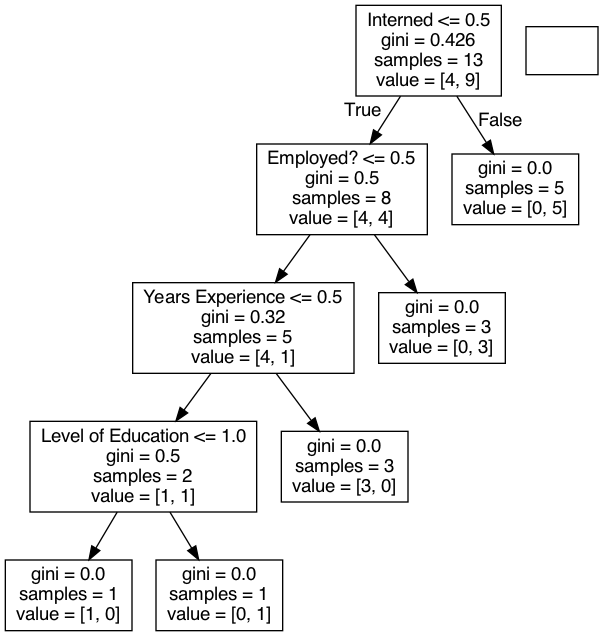

In [27]:
# Importing the Image class from IPython.display to display images in Jupyter notebooks.
from IPython.display import Image

# Importing the StringIO class from the six module, which provides a way to work with text as if it were a file.
from six import StringIO

# Importing the pydotplus library, which is used to create, parse, and visualize graph descriptions in DOT language.
import pydotplus

# Creating an instance of StringIO to temporarily store the DOT format description of the decision tree.
dot_data = StringIO()

# Exporting the decision tree 'clf' to a DOT format representation and storing it in 'dot_data'.
# The 'feature_names=features' parameter specifies the names of the features to be used in the graph.
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)

# Using pydotplus to read the DOT data from 'dot_data' and create a graph.
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Creating and displaying an image of the decision tree graph.
# The 'create_png()' method generates a PNG image from the graph.
Image(graph.create_png())


## Ensemble learning: using a random forest


We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:


In [28]:
# Importing the RandomForestClassifier class from the sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

# Creating an instance of the RandomForestClassifier with 10 decision trees
clf = RandomForestClassifier(n_estimators=10)
# Training the RandomForestClassifier using the feature set X and target y
clf = clf.fit(X, y)

# Predicting the outcome using a new data point [10, 1, 4, 0, 0, 0]
# The values in the list correspond to the features used for training
# The prediction is printed out
# print(clf.predict([[10, 1, 4, 0, 0, 0]]))

# Predicting the outcome for another data point [10, 0, 4, 0, 0, 0]
# Similar to above, this predicts and prints the outcome for the provided feature values
# print(clf.predict([[10, 0, 4, 0, 0, 0]]))


In [29]:
# Creating a DataFrame for prediction with the same feature names
prediction_input_1 = pd.DataFrame([{'Years Experience': 10, 'Employed?': 1, 'Previous employers': 4, 
                                    'Level of Education': 0, 'Top-tier school': 0, 'Interned': 0}])

prediction_input_2 = pd.DataFrame([{'Years Experience': 10, 'Employed?': 0, 'Previous employers': 4, 
                                    'Level of Education': 0, 'Top-tier school': 0, 'Interned': 0}])

# Making predictions with the properly formatted DataFrame
print(clf.predict(prediction_input_1))
print(clf.predict(prediction_input_2))


[1]
[0]


## Activity


Modify the test data to create an alternate universe where everyone I hire everyone I normally wouldn't have, and vice versa. Compare the resulting decision tree to the one from the original data.
